In [1]:
# Importando bibliotecas
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from minisom import MiniSom

from pylab import pcolor, colorbar, plot

In [2]:
# Lendo dados
data = pd.read_csv("../Databases/entradas_breast.csv")
label = pd.read_csv("../Databases/saidas_breast.csv")

In [3]:
# Separacao de features e label;
X = data.iloc[:,0:30].values
y = label.iloc[:,0].values # label

# Realizando normalizacao das features, para que estejam entre 0 e 1;
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [4]:
# Criando modelo;
mapSom = MiniSom(x=11,y=11, # Matriz de neuronios;
                 input_len=30, # Numero de entradas;
                 sigma=2.0, # Raio;
                 learning_rate=0.3, # Taxa de aprendizagem;
                 random_seed=0) # Semente aleatoria;

# Iniciando os pesos e realizando treinamento;
mapSom.random_weights_init(X) # Inicia os pessos dos neuronios;
mapSom.train_random(data=X, num_iteration = 1000) # Treinamento;

In [5]:
# Pesos;
mapSom._weights

# Valores do mapa auto-organizavel
mapSom._activation_map

values_BMU = mapSom.activation_response(X)

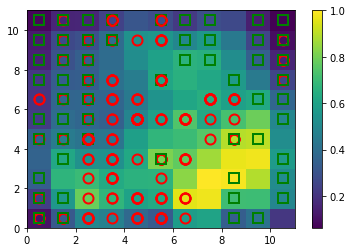

In [6]:
# Configurando dplotagem;
pcolor(mapSom.distance_map().T)
colorbar()

# DEfinindo cores e estilos de desenhos;
makers =['o','s'] 
color = ['r', 'g']

# Desenhando mo grafico;
for i, x in enumerate(X):
    winner = mapSom.winner(x)
    plot(winner[0] + 0.5, winner[1] + 0.5, makers[y[i]],
            markerfacecolor = 'None', markersize=10,
            markeredgecolor= color[y[i]], markeredgewidth=2)
